In [ ]:
!pip install fastf1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.8/128.8 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 16.1 MB/s eta 0:00:00


In [ ]:
import fastf1

In [ ]:
sessions = []
for i in range(1,23):
    try:
        y = fastf1.get_session(2023,i,"Sprint")
        y.load(laps = False, telemetry = False, weather = False, messages = False)
        sessions.append(y) #change the order put the tr block first later on
    except:
        pass
    x = fastf1.get_session(2023,i,"Race")
    x.load(laps=True, telemetry=False, weather=False, messages=False)
    sessions.append(x)

req         WARNING 	DEFAULT CACHE ENABLED! (24.0 KB) /root/.cache/fastf1
core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.3.1]
INFO:fastf1.fastf1.core:Loading data for Bahrain Grand Prix - Race [v3.3.1]
req            INFO 	No cached data found for session_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
INFO:fastf1.api:Fetching session info data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loadin

In [ ]:
sessions[2].laps.sort_values('LapTime')

In [ ]:
finish = sessions.copy()
fast_driver = []
fast_team = []

for i in range(len(sessions)):
    finish[i] = sessions[i].results[sessions[i].results['TeamId'] != 'red_bull'][['Abbreviation', 'TeamId', 'Position']]
    finish[i]['Type'] = sessions[i].name
    try:
        if sessions[i].laps.pick_fastest()['Team'] == 'Red Bull Racing':
            for j,k in pd.DataFrame(sessions[i].laps.sort_values('LapTime')).iterrows():
                print("anything lol")
                if pd.dataFrame(j)['Team']!= 'Red Bull Racing':
                    fast_driver.append(j['Driver'])
                    fast_team.append(j['Team'])

    except:
        fast_driver.append(None)
        fast_team.append(None)

NameError: name 'sessions' is not defined

In [ ]:
fast_driver

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [ ]:
import pandas as pd

In [ ]:
for i in finish:
    count = 0
    i['Position'].fillna(20.0, inplace = True)
    i['Position'] = i['Position'].astype(int)
    for j, k in pd.DataFrame(i).iterrows():
        count+=1
        if k['Position']!= count:
            i.at[j, 'Position'] = count

In [ ]:
drivers = {}
constructors = {}

points = [25,18,15,12,10,8,6,4,2,1,0,0,0,0,0,0,0,0,0,0]
sprints = [8,7,6,5,4,3,2,1,0,0,0,0,0,0,0,0,0,0,0,0]
count = -1

for i in finish: #populate drivers with all the entries and an array of 0's for now
    for j,k in pd.DataFrame(i).iterrows():
        if k['Abbreviation'] not in drivers:
            drivers[k['Abbreviation']] = [0] * len(finish)

for w,i in enumerate(finish):
    print(sessions[w].laps)
    count+=1
    for j, k in pd.DataFrame(i).iterrows():
        team = k['TeamId']
        driver = k['Abbreviation']

        if k['Type'] == "Race":
            point = points[int(k['Position'])-1]
        else:
            point = sprints[int(k['Position'])-1]

        drivers[driver][count] = point
        if team not in constructors:
            constructors[team] = [point]
        else:
            constructors[team].append(point)

for j in constructors:
    for k in range(len(constructors[j]) - 1):
        if constructors[j][k] is not None:
            constructors[j][k] = constructors[j][k] + constructors[j][k + 1]
            constructors[j][k + 1] = None

    constructors[j] = [i for i in constructors[j] if i is not None]
    for x in range(1,len(constructors[j])):
        constructors[j][x]+=constructors[j][x-1]

for k in drivers:
    for y in range(1, len(drivers[k])):
        drivers[k][y]+=drivers[k][y-1]

NameError: name 'finish' is not defined

In [ ]:
import matplotlib.pyplot as plt
import fastf1.plotting

In [ ]:
names = [i.event.Location for i in sessions]
for i,j in enumerate(finish):
    print(names[i])
    print(j[:3], '\n')


Sakhir
   Abbreviation        TeamId  Position  Type
14          ALO  aston_martin         1  Race
55          SAI       ferrari         2  Race
44          HAM      mercedes         3  Race 

Jeddah
   Abbreviation        TeamId  Position  Type
14          ALO  aston_martin         1  Race
63          RUS      mercedes         2  Race
44          HAM      mercedes         3  Race 

Melbourne
   Abbreviation        TeamId  Position  Type
44          HAM      mercedes         1  Race
14          ALO  aston_martin         2  Race
18          STR  aston_martin         3  Race 

Baku
   Abbreviation        TeamId  Position  Type
16          LEC       ferrari         1  Race
14          ALO  aston_martin         2  Race
55          SAI       ferrari         3  Race 

Baku
   Abbreviation    TeamId  Position    Type
16          LEC   ferrari         1  Sprint
63          RUS  mercedes         2  Sprint
55          SAI   ferrari         3  Sprint 

Miami
   Abbreviation        TeamId  Positio

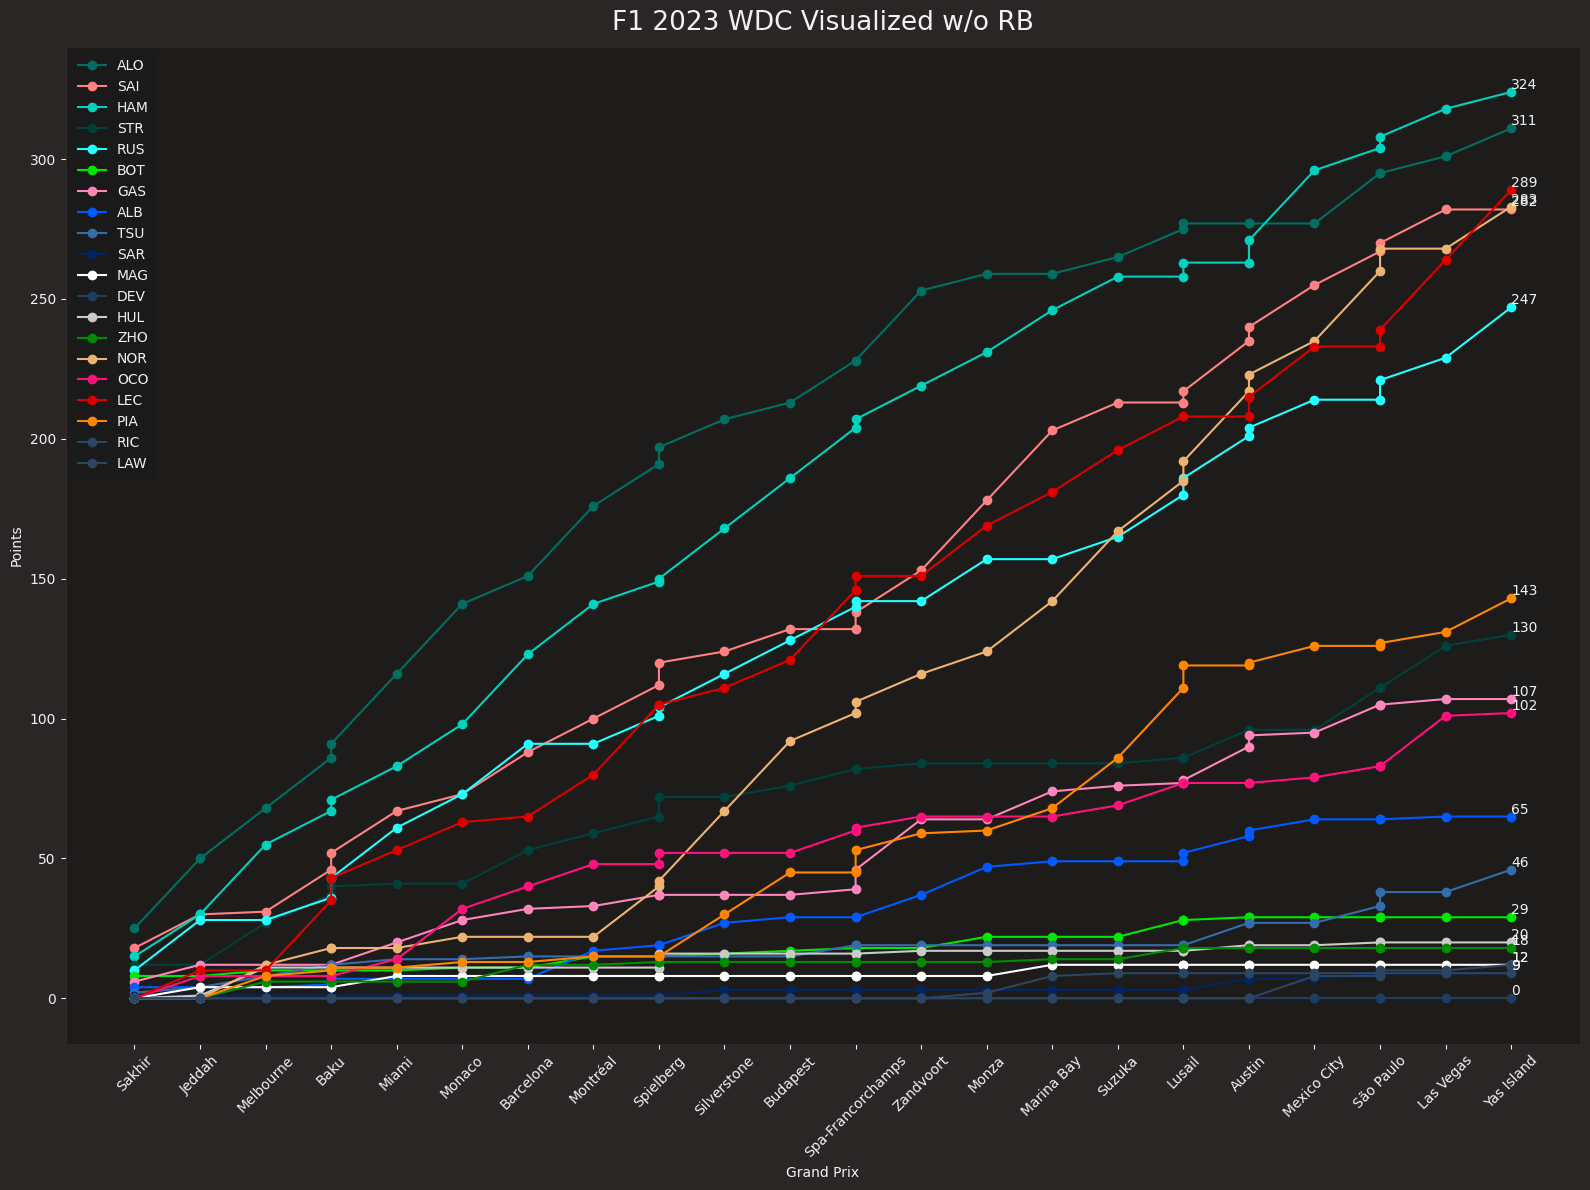

In [ ]:
fastf1.plotting.setup_mpl()
plt.figure(figsize=(16,12))
for key, values in drivers.items():
    plt.plot(names, values, label=key, color=fastf1.plotting.driver_color(key), marker="o")
    plt.text(names[-1], values[-1], str(values[-1]), ha='left', va='bottom')

plt.xlabel('Grand Prix')
plt.ylabel('Points')
plt.title('F1 2023 WDC Visualized w/o RB')
plt.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
print(constructors.keys())

dict_keys(['aston_martin', 'ferrari', 'mercedes', 'alfa', 'alpine', 'williams', 'alphatauri', 'haas', 'mclaren'])


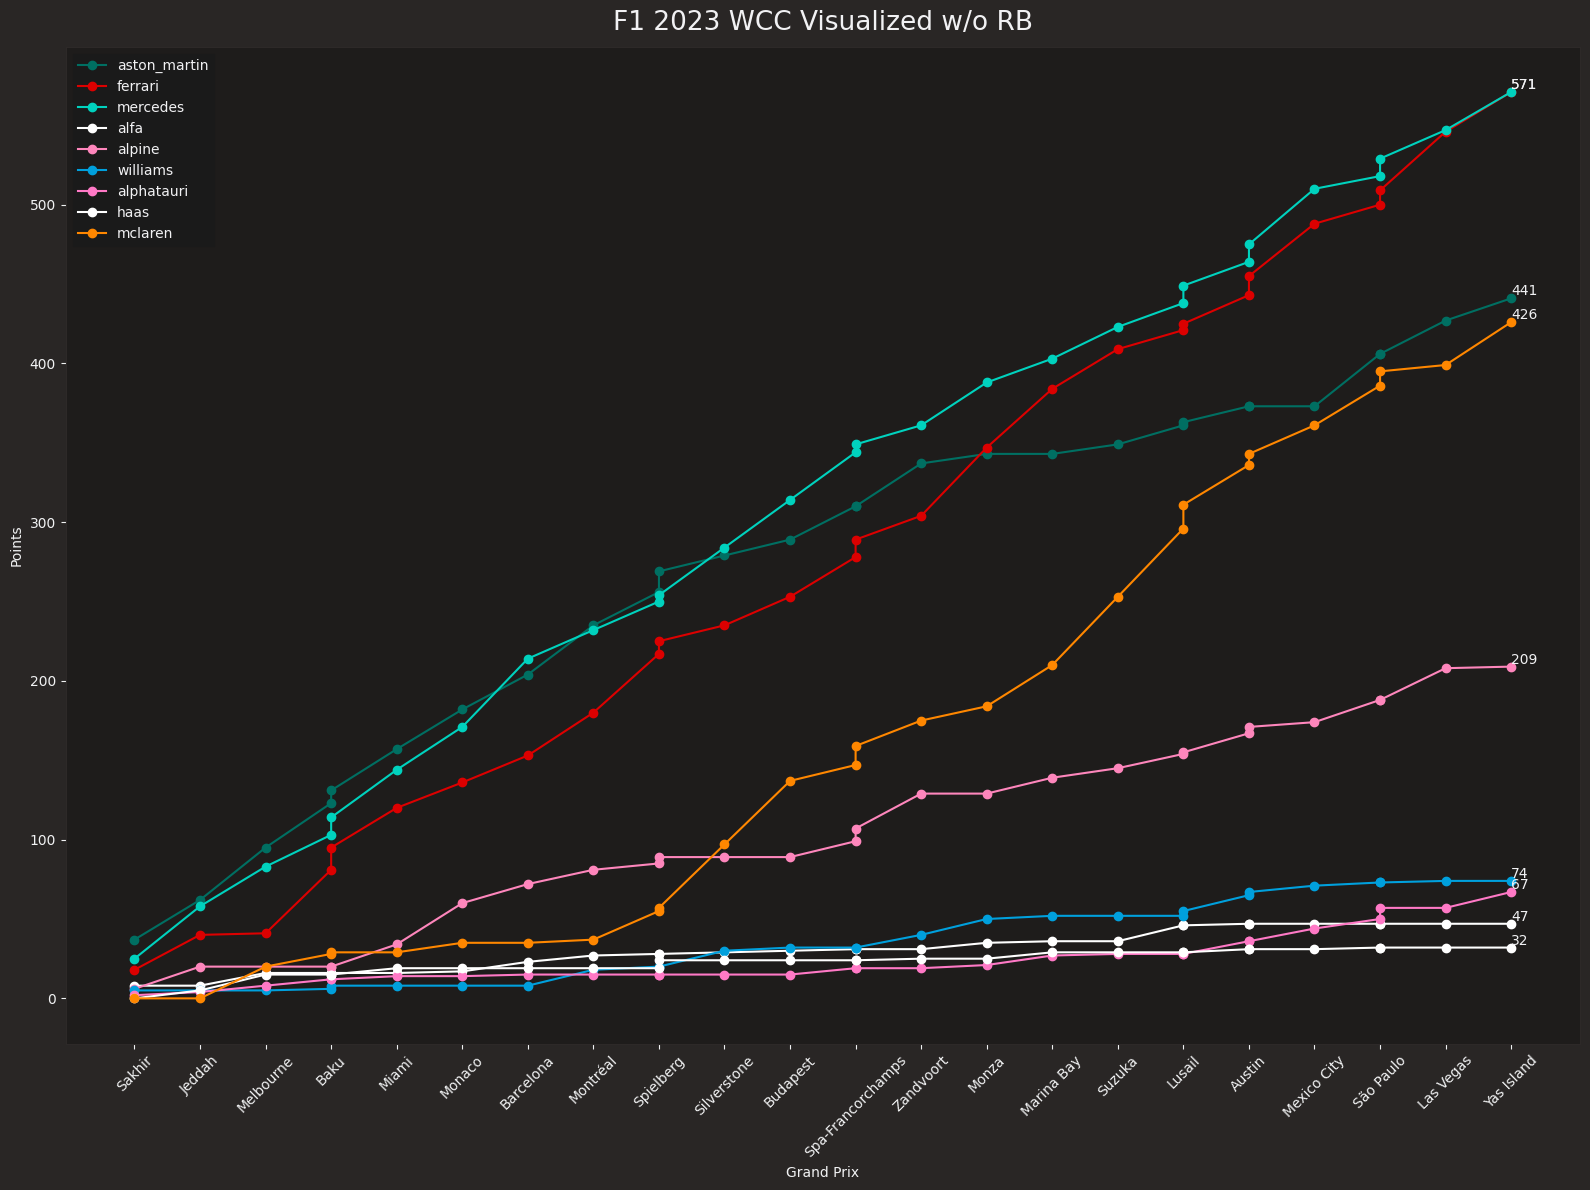

In [ ]:
plt.figure(figsize=(16,12))
for key, values in constructors.items():
    try:
        plt.plot(names, values, label=key, color=fastf1.plotting.team_color(key), marker="o")
    except:
        plt.plot(names, values, label=key, marker="o")
    plt.text(names[-1], values[-1], str(values[-1]), ha='left', va='bottom')

plt.xlabel('Grand Prix')
plt.ylabel('Points')
plt.title('F1 2023 WCC Visualized w/o RB')
plt.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
[i[-1] for i in constructors.values()]

[441, 571, 571, 47, 209, 74, 67, 32, 426]